In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
val = pd.read_csv("volume_validation_test3_full.csv", encoding="cp949")

In [29]:
a = pd.DataFrame([[1, 1, 1, 1, 5, 1],[1, 1, 1, 2, 3, 2],[1, 1, 2, 1, 7, 3],[1, 1, 2, 2, 9, 4],
                  [1, 2, 1, 1, 2, 5], [1, 2, 1, 2, 4, 6], [1, 2, 2, 1, 1, 7], [1, 2, 2, 2, 9, 8]], 
                  columns=["d", "t", "r", "s", "v", "q"])

In [41]:
b = a.groupby(["d", "t", "r"]).agg({'v': ['mean', 'std'], 'q': ['mean', 'std']})
for aq in b.items():
    print(aq[0])
    for qw in aq[1].items():
        print(qw)

('v', 'mean')
((1, 1, 1), 4.0)
((1, 1, 2), 8.0)
((1, 2, 1), 3.0)
((1, 2, 2), 5.0)
('v', 'std')
((1, 1, 1), 1.4142135623730951)
((1, 1, 2), 1.4142135623730951)
((1, 2, 1), 1.4142135623730951)
((1, 2, 2), 5.656854249492381)
('q', 'mean')
((1, 1, 1), 1.5)
((1, 1, 2), 3.5)
((1, 2, 1), 5.5)
((1, 2, 2), 7.5)
('q', 'std')
((1, 1, 1), 0.7071067811865476)
((1, 1, 2), 0.7071067811865476)
((1, 2, 1), 0.7071067811865476)
((1, 2, 2), 0.7071067811865476)


In [37]:
b = a.groupby(["d", "t", "r"])['v', 'q'].mean()
b
#for aq in b.items():
#    print(aq)

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [ ]:
val_3 = val.groupby(["date", "time", "road"]).agg({"result_volume": ['mean', 'std'], "answer_volume": ['mean', 'std']})

In [5]:
b.to_csv("test_csvfile.csv", encoding="cp949", index=False)

0       4
14      5
28      6
42      7
56      8
70      9
84     11
98     12
112    13
126    14
140    15
154    16
168    17
182    18
196    19
210    20
224    21
238    22
252    23
266    25
280    26
294    27
308    28
322    29
336    30
Name: date, dtype: int64


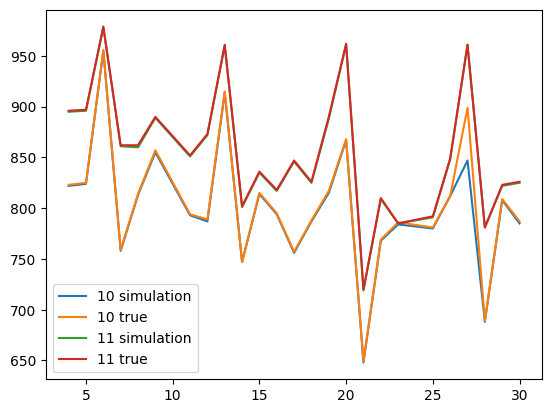

In [3]:
for r in val["road"].unique():
    target = val[val["road"]==r]
    ten = target[target["time"]==10]
    ele = target[target["time"]==11]
    x = ten["date"]
    print(x)
    re_ten = ten["result_volume"]
    an_ten = ten["answer_volume"]
    re_ele = ele["result_volume"]
    an_ele = ele["answer_volume"]
    plt.plot(x, re_ten, label="10 simulation")
    plt.plot(x, an_ten, label="10 true")
    plt.plot(x, re_ele, label="11 simulation")
    plt.plot(x, an_ele, label="11 true")
    plt.legend()
    break

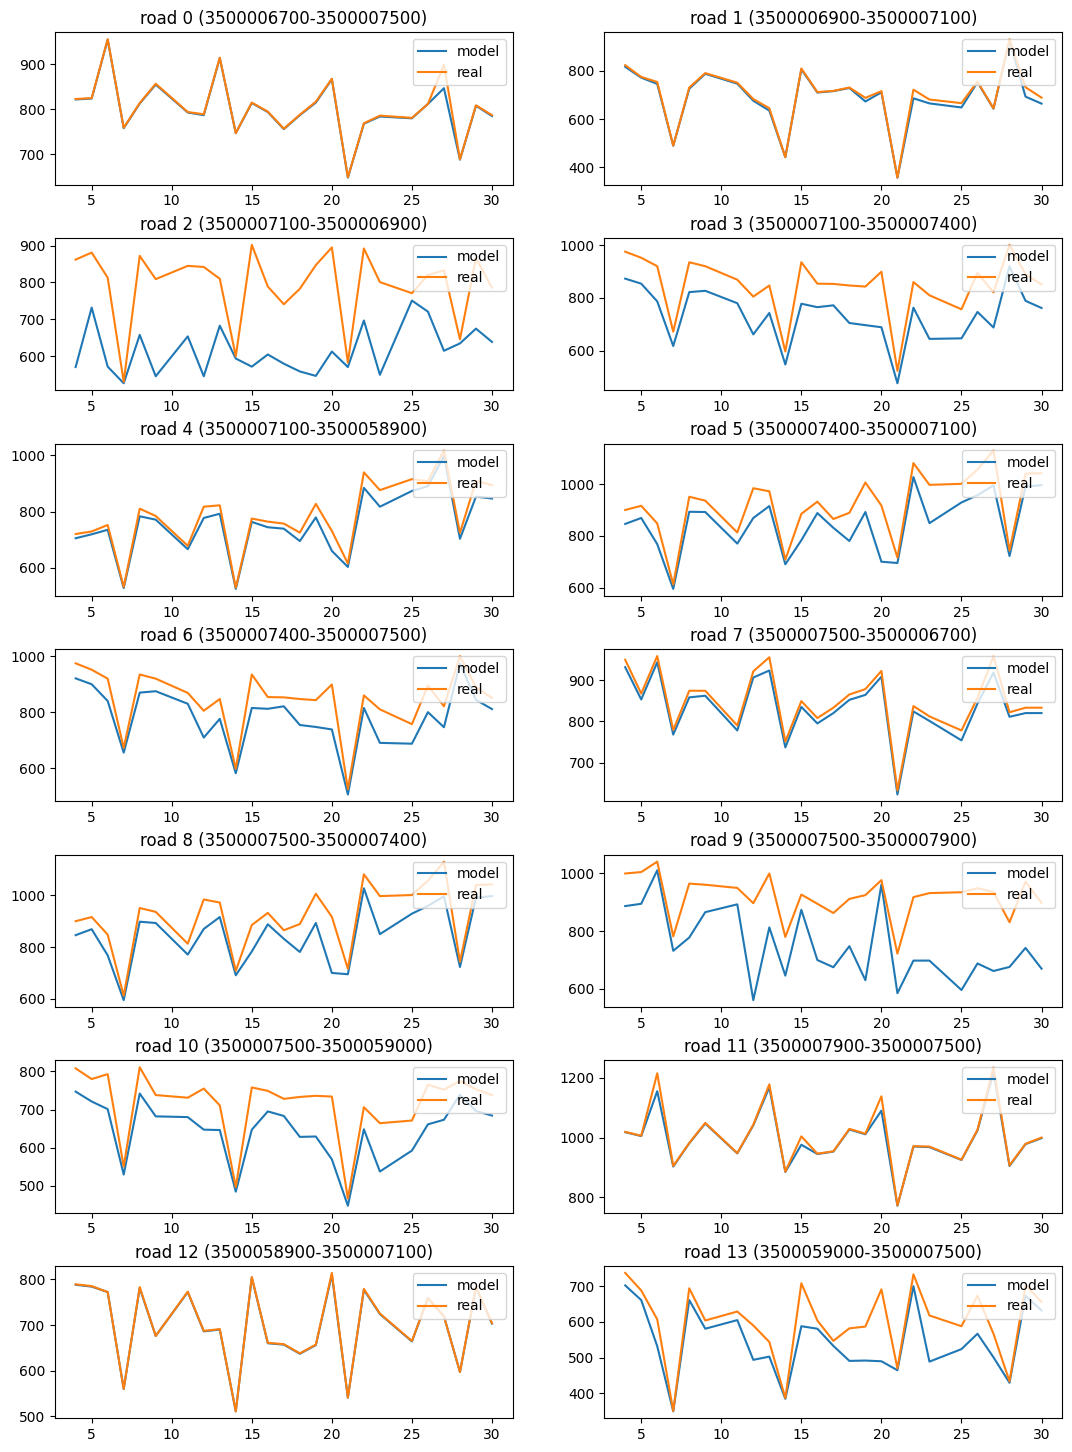

In [11]:
f, axes = plt.subplots(7, 2)
f.set_size_inches((13, 18))
plt.subplots_adjust(wspace=0.2, hspace = 0.35)

for i, r in enumerate(val["road"].unique()):
    target = val[val["road"]==r]
    ten = target[target["time"]==10]
    ele = target[target["time"]==11]
    x = ten["date"]
    re_ten = ten["result_volume"]
    an_ten = ten["answer_volume"]
    
    axes[int(i/2), i%2].plot(x, re_ten, label="model")
    axes[int(i/2), i%2].plot(x, an_ten, label="real")
    axes[int(i/2), i%2].set_title(f"road {i} ({r})")
    axes[int(i/2), i%2].legend(loc="upper right")

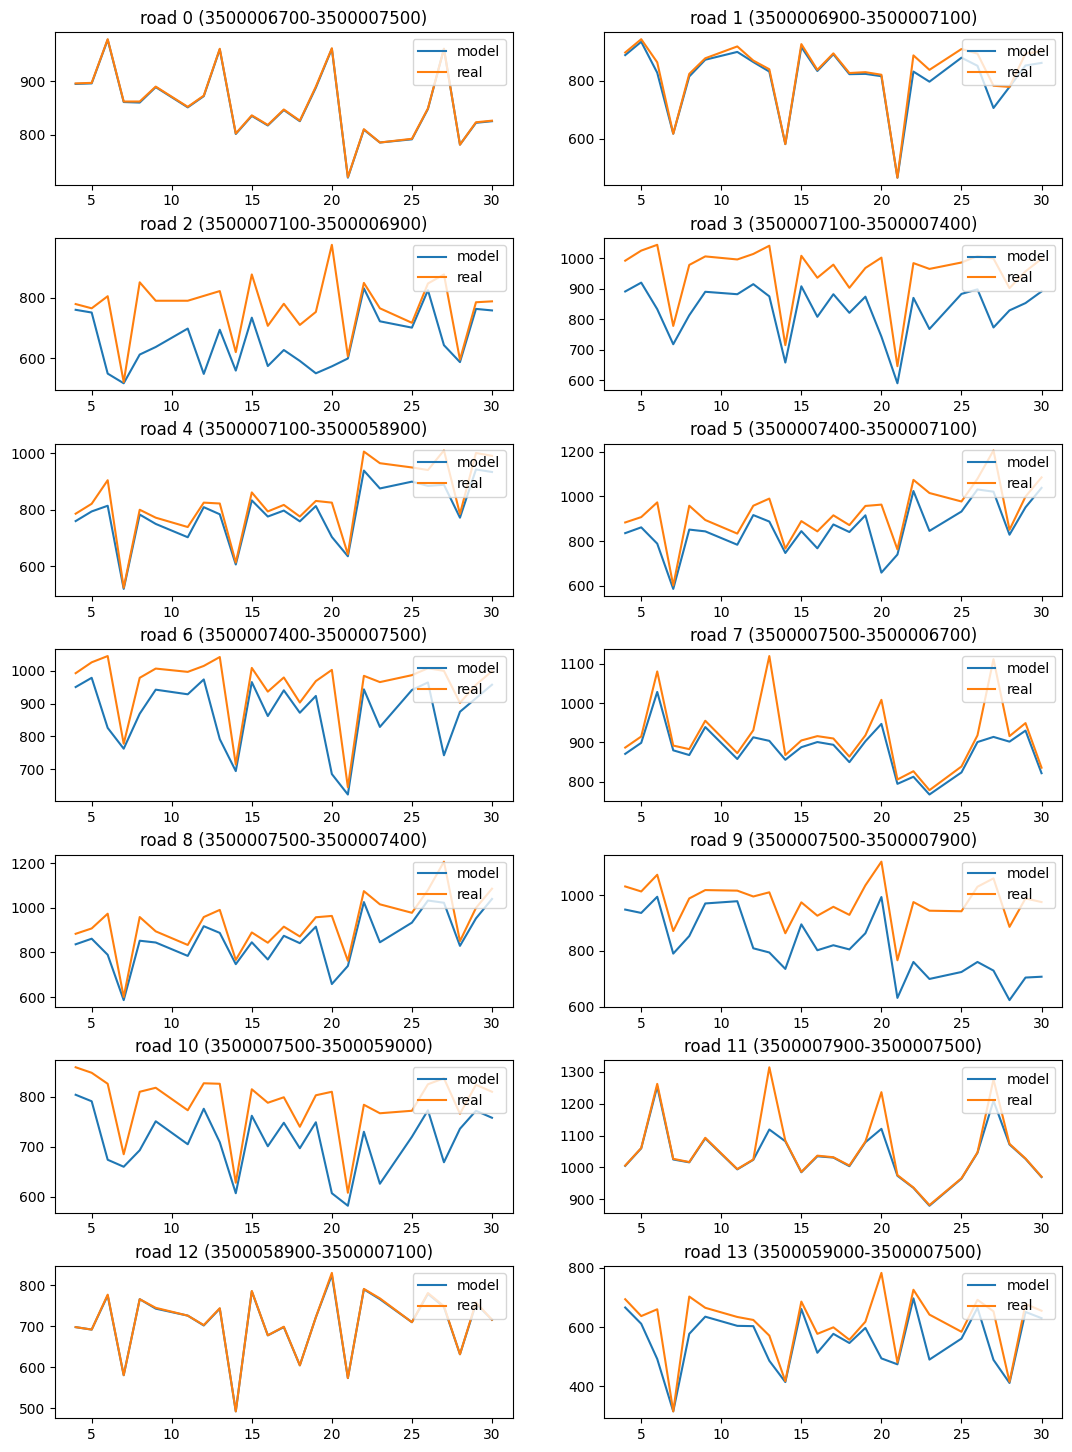

In [12]:
f, axes = plt.subplots(7, 2)
f.set_size_inches((13, 18))
plt.subplots_adjust(wspace=0.2, hspace = 0.35)

for i, r in enumerate(val["road"].unique()):
    target = val[val["road"]==r]
    ten = target[target["time"]==10]
    ele = target[target["time"]==11]
    x = ten["date"]
    re_ele = ele["result_volume"]
    an_ele = ele["answer_volume"]
    
    axes[int(i/2), i%2].plot(x, re_ele, label="model")
    axes[int(i/2), i%2].plot(x, an_ele, label="real")
    axes[int(i/2), i%2].set_title(f"road {i} ({r})")
    axes[int(i/2), i%2].legend(loc="upper right")

In [13]:
roads = val["road"].unique()
column = ["date"]
for road in roads:
    column.append(road)
column.append("percentage")

gehs = pd.DataFrame(columns=column)
j = 0

for i, d in enumerate(val["date"].unique()):
    target = val[val["date"]==d]
    ten = target[target["time"]==10]
    count = 0
    geh = []
    for r in ten["road"]:
        v = ten[ten["road"]==r]
        geh.append(v["GEH"].values[0])
        if v["GEH_group"].values[0] == 0:
            count += 1
    iv = [int(d)] + geh + [round(count/14, 2)]
    gehs.loc[j] = iv
    j += 1
gehs.to_csv("test3_10_geh.csv", encoding="cp949", index=False)
gehs

,date,3500006700-3500007500,3500006900-3500007100,3500007100-3500006900,3500007100-3500007400,3500007100-3500058900,3500007400-3500007100,3500007400-3500007500,3500007500-3500006700,3500007500-3500007400,3500007500-3500007900,3500007500-3500059000,3500007900-3500007500,3500058900-3500007100,3500059000-3500007500,percentage
0,4.0,0.03,0.24,10.87,3.36,0.56,1.83,1.75,0.59,1.83,3.68,2.19,0.03,0.04,1.30,0.93
1,5.0,0.03,0.11,5.25,3.26,0.37,1.57,1.71,0.48,1.57,3.57,2.15,0.03,0.04,1.04,0.93
2,6.0,0.03,0.29,9.16,4.55,0.62,2.81,2.70,0.49,2.81,0.94,3.37,1.74,0.00,3.14,0.93
3,7.0,0.04,0.00,0.17,2.13,0.17,0.69,0.66,0.40,0.69,1.82,0.90,0.07,0.00,0.05,1.00
4,8.0,0.04,0.19,7.74,3.81,0.96,1.91,2.16,0.54,1.74,6.33,2.48,0.03,0.07,1.27,0.86
5,9.0,0.07,0.11,10.10,3.15,0.47,1.46,1.50,0.41,1.42,3.14,2.10,0.06,0.00,0.94,0.93
6,11.0,0.04,0.15,6.98,3.10,0.46,1.53,1.34,0.43,1.49,1.88,1.92,0.03,0.04,0.97,0.93
7,12.0,0.07,0.27,11.24,5.28,1.42,3.78,3.49,0.50,3.74,12.44,4.08,0.06,0.04,4.12,0.79
8,13.0,0.03,0.40,4.65,3.69,1.06,1.86,2.49,1.04,1.82,6.21,2.50,0.29,0.04,1.79,0.93
9,14.0,0.00,0.00,0.25,2.05,0.17,0.68,0.66,0.51,0.64,5.02,0.54,0.03,0.00,0.10,0.93


In [14]:
roads = val["road"].unique()
column = ["date"]
for road in roads:
    column.append(road)
column.append("percentage")

gehs = pd.DataFrame(columns=column)
j = 0

for i, d in enumerate(val["date"].unique()):
    target = val[val["date"]==d]
    ele = target[target["time"]==11]
    count = 0
    geh = []
    for r in ele["road"]:
        v = ele[ele["road"]==r]
        geh.append(v["GEH"].values[0])
        if v["GEH_group"].values[0] == 0:
            count += 1
    iv = [int(d)] + geh + [round(count/14, 2)]
    gehs.loc[j] = iv
    j += 1
gehs.to_csv("test3_11_geh.csv", encoding="cp949", index=False)
gehs

,date,3500006700-3500007500,3500006900-3500007100,3500007100-3500006900,3500007100-3500007400,3500007100-3500058900,3500007400-3500007100,3500007400-3500007500,3500007500-3500006700,3500007500-3500007400,3500007500-3500007900,3500007500-3500059000,3500007900-3500007500,3500058900-3500007100,3500059000-3500007500,percentage
0,4.0,0.03,0.30,0.68,3.29,0.94,1.64,1.35,0.54,1.60,2.64,1.91,0.03,0.00,1.07,1.00
1,5.0,0.03,0.29,0.51,3.37,0.95,1.55,1.49,0.53,1.55,2.47,1.99,0.03,0.00,1.04,1.00
2,6.0,0.03,1.24,9.84,6.89,3.07,6.23,7.13,1.60,6.20,2.46,5.55,0.23,0.07,7.00,0.50
3,7.0,0.03,0.00,0.18,2.19,0.17,0.62,0.54,0.40,0.57,2.81,0.96,0.06,0.00,0.00,1.00
4,8.0,0.07,0.31,8.84,5.51,0.60,3.56,3.59,0.51,3.52,4.45,4.27,0.03,0.00,4.98,0.86
5,9.0,0.03,0.17,5.73,3.77,0.80,1.73,2.05,0.52,1.70,1.52,2.39,0.06,0.07,1.18,0.93
6,11.0,0.03,0.63,3.37,3.72,1.34,1.76,2.19,0.51,1.72,1.20,2.50,0.03,0.00,1.21,1.00
7,12.0,0.03,0.17,9.92,3.19,0.56,1.37,1.30,0.59,1.34,6.19,1.80,0.03,0.04,0.85,0.86
8,13.0,0.03,0.28,4.65,5.36,1.34,3.36,8.22,6.76,3.36,7.19,4.22,5.59,0.04,3.70,0.64
9,14.0,0.04,0.00,2.51,2.18,0.28,0.73,0.75,0.41,0.69,4.53,0.85,0.06,0.00,0.15,1.00


In [78]:
val_full = pd.read_csv("volume_validation_test_full.csv", encoding="cp949")

['3500006700-3500007500', '3500006900-3500007100', '3500007100-3500006900', '3500007100-3500007400', '3500007100-3500058900', '3500007350-3500007700', '3500007400-3500007100', '3500007400-3500007500', '3500007500-3500006700', '3500007500-3500007400', '3500007500-3500007900', '3500007500-3500059000', '3500007700-3500007350', '3500007700-3500056400', '3500007700-3500062550', '3500007700-3500066400', '3500007700-3500081900', '3500007900-3500007500', '3500058900-3500007100', '3500059000-3500007500', '3500062550-3500007700', '3500066400-3500007700', '3510000251-3510000250', '3510000400-3510000450', '3510000400-3510000500', '3510000450-3510000400', '3510000450-3510000451', '3510000500-3510000400', '3510021250-3510021500', '3510021500-3510021250', '3510021500-3510021700', '3510021700-3510021500', '3510021750-3510334000', '3510334000-3510021750']
[ 372  249  370  268  387  247  384  214  465  407  165  406  197  225
  528   12   80  353  252  694  128  445   61 1103 1090  636   27 1108
  304  

TypeError: can only concatenate list (not "tuple") to list

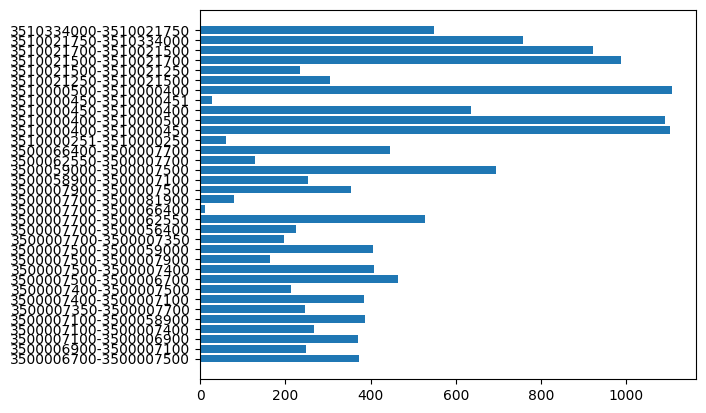

In [105]:
# f2, axes2 = plt.subplots(2, 2)
# f.set_size_inches((13, 18))
# plt.subplots_adjust(wspace=0.2, hspace = 0.35)

roads = val_full["road"].unique().tolist()

ten = val_full[val_full["time"]==10]
re_ten = ten["result_volume"]
an_ten = ten["answer_volume"]

print(roads)
print(re_ten.values)

bw = 0,25

plt.barh(roads, re_ten.values)
plt.barh(roads+bw, an_ten.values, bw)

#axes2[0, 0].bar(roads, re_ten.values)
#axes2[0, 0].bar(roads, an_ten.values)

#ele = val_full[val_full["time"]==11]
#re_ele = ele["result_volume"]
#an_ele = ele["answer_volume"]

#axes[1, 0].bar(roads, re_ele)
#axes[1, 0].bar(roads, an_ele)


# axes[int(i/2), i%2].set_title(f"road {r}")
# axes[int(i/2), i%2].legend(loc="upper right")
